###Get Lists of Artists

This computes a list of small, medium, large, and xlarge artists derived from a standard distribution of Spotify followers for artists (dataset from Kaggle)

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")
file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"
df = pd.read_csv(file_path)

100%|██████████| 5.02M/5.02M [00:00<00:00, 27.6MB/s]


Extracting files...


In [ ]:
# Filter out any artsits with less than 15000 followers and filter out duplicates
df = df.drop_duplicates(subset=["ids"])
df = df[df["ids"] != "3Kji8hBU9Tqea6pAWRwagQ"] # this guy causes problems bc he doesn't exist in youtube apparently?
df_filtered = df[df['followers'] > 15000]

# These values are the 5th, 50th, and 95th percentiles of the number of followers
# fiftieth_percentile = int(df['followers'].median())
one_third_percentile = int(df_filtered['followers'].quantile(0.3166666666666))
two_thirds_percentile = int(df_filtered['followers'].quantile(0.633333333333))
top_five_percentile = int(df_filtered['followers'].quantile(0.95))

df_small = df_filtered[df_filtered['followers'] <= one_third_percentile]
df_medium = df_filtered[(df_filtered['followers'] >= one_third_percentile) & (df_filtered['followers'] <= two_thirds_percentile)]
df_large = df_filtered[(df_filtered['followers'] >= two_thirds_percentile) & (df_filtered['followers'] <= top_five_percentile)]
df_xlarge = df_filtered[(df_filtered['followers'] >= top_five_percentile)]


print(f"1/3 percentile: {one_third_percentile}")
print(f"2/3 percentile: {two_thirds_percentile}")

# print(f"Fifth percentile: {fifth_percentile}")
# print(f"Fiftieth percentile: {fiftieth_percentile}")
# print(f"Ninty-fifth percentile: {ninety_fifth_percentile}")

1/3 percentile: 86009
2/3 percentile: 430684


In [ ]:
from collections import Counter

artist_list_small = df_small['names'].tolist()
artist_list_medium = df_medium['names'].tolist()
artist_list_large = df_large['names'].tolist()
artist_list_xlarge = df_xlarge['names'].tolist()

print(len(artist_list_small))
print(len(artist_list_medium))
print(len(artist_list_large))
print(len(artist_list_xlarge))

1705
1705
1705
270


####Choose Random Artists

This is a random sampling of num_artists within each artist size group

In [ ]:
import random

def choose_random_artists(artist_list, num_artists=400):
  if len(artist_list) < num_artists:
    return artist_list
  return random.sample(artist_list, num_artists)


# select 10 random artists from each category (small, medium, large)
random_small_artists = choose_random_artists(artist_list_small)
random_medium_artists = choose_random_artists(artist_list_medium)
random_large_artists = choose_random_artists(artist_list_large)
random_xlarge_artists = choose_random_artists(artist_list_xlarge)

print("Random Small Artists:", random_small_artists)
print("Random Medium Artists:", random_medium_artists)
print("Random Large Artists:", random_large_artists)
print("Random X-Large Artists:", random_xlarge_artists)

Random Small Artists: ['the boo radleys', 'charli adams', 'sonny alven', 'byron juane', 'willy mason', 'parc jae jung', 'sunny sweeney', 'dz deathrays', 'miller blue', 'richard houghten', 'staatskapelle dresden', 'icandy', 'darlingside', 'tami neilson', 'dj tennis', 'lonesome river band', 'txc', 'aftershock', 'sabai', 'carol ades', 'kim minseok', 'matt sassari', 'presence', 'sean stemaly', 'whipped cream', 'fana hues', 'militarie gun', 'john paul white', 'dezko', 'resolve', 'the armed', 'ydg', 'madi diaz', 'julian perretta', 'the kite string tangle', 'thama', 'gouge away', 'tiacorine', 'rosemary & garlic', 'yumdda', 'kat hasty', 'wizz havinn', '1415', 'badger', 'aissa', 'david morris', 'tei', 'andrea bejar', 'digital ethos', 'natalie hemby', 'stellardrone', 'tor', 'samplifire', 'brando', 'tommy lefroy', 'eleine', 'matt holubowski', 'gardenstate', 'brown eyes', 'raggarligan', 'woodes', 'kiri t', 'danny & the juniors', 'kelli-leigh', 'rødhåd', 'josh pan', 'pazoo', 'troubleboy hitmaker', 

####Converting from Spotify to Youtube Music Subscribers

From the Spotify Kaggle dataset, we use followers as our metric for statistical analysis of small, medium, large, and xl artists. Due to the switch to Youtube Music, we needed to translate Spotify followers into Youtube Music subscribers. To do this, we make the assumption that there is a strong correlation between the two metrics. ADD INFORMATION ABOUT THE JSON YOUTUBE INFORMATION QUERIES

In [ ]:
# define the lower and higher ends of sub counts for each cetegory

import json
import numpy as np

with open('artist_subscribers_dict.json', 'r') as file:
    followers_dict = json.load(file)

artist_list_small_subs = []
for artist in artist_list_small:
  artist_list_small_subs += [followers_dict[artist]["size"]]

artist_list_medium_subs = []
for artist in artist_list_medium:
  artist_list_medium_subs += [followers_dict[artist]["size"]]

artist_list_large_subs = []
for artist in artist_list_large:
  artist_list_large_subs += [followers_dict[artist]["size"]]

artist_list_xlarge_subs = []
for artist in artist_list_xlarge:
  artist_list_xlarge_subs += [followers_dict[artist]["size"]]

# print(followers_dict)

avg_small_subs = int(np.mean(artist_list_small_subs))
avg_medium_subs = int(np.mean(artist_list_medium_subs))
avg_large_subs = int(np.mean(artist_list_large_subs))
avg_xlarge_subs = int(np.mean(artist_list_xlarge_subs))

print(int(np.mean(artist_list_small_subs)))
print(int(np.mean(artist_list_medium_subs)))
print(int(np.mean(artist_list_large_subs)))
print(int(np.mean(artist_list_xlarge_subs)))

# small_artists_min_max = (min(artist_list_small_subs), max(artist_list_small_subs))
# print(small_artists_min_max)
# medium_artists_min_max = (min(artist_list_medium_subs), max(artist_list_medium_subs))
# print(medium_artists_min_max)
# large_artists_min_max = (min(artist_list_large_subs), max(artist_list_large_subs))
# print(large_artists_min_max)
# xlarge_artists_min_max = (min(artist_list_xlarge_subs), max(artist_list_xlarge_subs))
# print(xlarge_artists_min_max)

54149
228149
1329673
13838555


###YouTube API

In [ ]:
!pip install ytmusicapi

from ytmusicapi import YTMusic

yt = YTMusic()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Search by artist name or artist's browse ID.
# Searching by name assumes that the top search is the corret artist
def getArtist(artist_name="", browseId=""):
  if browseId != "":
    return yt.get_artist(browseId)
  else:
    artists = yt.search(query=artist_name, filter="artists")
    if not artists:
      return None
    return yt.get_artist(artists[0]['browseId'])

In [ ]:
# # ***********************************************************************************************************************
# # PLEASE ONLY RUN THIS COMMAND ONCE PER INSTANCE THIS WILL TAKE A SHIT TON OF TIME BC THERE ARE API CALLS FOR EACH ARTIST
# # ***********************************************************************************************************************

# # !pip install tqdm
# from tqdm import tqdm

# # Create dictionary with data from YouTube Music API subscriber counts

# # Converts a string with suffixes like K, M, B to a numerical value
def convertToNumber(s):
    suffix_multipliers = {
        'K': 1_000,   # Thousand
        'M': 1_000_000,  # Million
        'B': 1_000_000_000  # Billion
    }

    if s[-1].upper() in suffix_multipliers:
        multiplier = suffix_multipliers[s[-1].upper()]
        return float(s[:-1]) * multiplier
    else:
        return float(s)

# # followers_dict = {}
# exceptions_list = []

# for i, artist in tqdm(df_filtered.iloc[::-1].iterrows(), total=len(df_filtered), desc="Processing Artists", miniters=75):
#   if all(artist_name in followers_dict for artist_name in df_filtered["names"]):
#         break

#   if artist["names"] not in followers_dict:
#     if i % 100 == 0:
#         print("Len:", len(followers_dict))

#     try:
#       followers_dict[artist["names"]] = {"size": (convertToNumber(getArtist(artist_name=artist["names"])["subscribers"]))/10000}
#     except Exception as e:
#       exceptions_list += [artist]
#       print("exceptions_list:", exceptions_list)
#       # print("Names:", artist["names"])
#       # print("getArtist:", getArtist(artist_name=artist["names"]))
#       # print("getArtist subscribers:", getArtist(artist_name=artist["names"])["subscribers"])
#       # print("getArtist subscribers converted:", (convertToNumber(getArtist(artist_name=artist["names"])["subscribers"])))
#       print("ERROR:", e)
#       break


# print(followers_dict)

# # ***********************************************************************************************************************
# # PLEASE ONLY RUN THIS COMMAND ONCE PER INSTANCE THIS WILL TAKE A SHIT TON OF TIME BC THERE ARE API CALLS FOR EACH ARTIST
# # ***********************************************************************************************************************
# # perhaps instead we can create a file that we write to so that we don't need to run this more than 1 time and just fetch the sub counts from there

In [ ]:
# followers_dict = wip_followers_dict
# print(len(followers_dict))
# print(len(df_filtered))
# wip_followers_dict = followers_dict.copy()
# print(len(wip_followers_dict))


In [ ]:
# for artist_name, data in followers_dict.items():
#     # Multiply the size by 10000 to undo the scaling
#     data["size"] *= 10000

# import json
# with open('artist_subscribers_dict.json', 'w') as file:
#     json.dump(followers_dict, file)

In [ ]:
# Use this to read in the JSON file with the sub counts
# Download the file from Drive and upload it using the colab files tab (on the left)

import json
with open('artist_subscribers_dict.json', 'r') as file:
    followers_dict = json.load(file)

print(followers_dict)

{'stayc': {'size': 1760000.0}, 'langhorne slim': {'size': 11100.000000000002}, 'luke bryan': {'size': 3270000.0}, 'the boyz': {'size': 2300000.0}, 'wendy': {'size': 147.0}, 'mad season': {'size': 35300.0}, 'little may': {'size': 12100.0}, 'chris cornell': {'size': 430000.0}, 'j-hope': {'size': 1810000.0}, 'tomorrow x together': {'size': 12400000.0}, 'temple of the dog': {'size': 192000.0}, 'delta rae': {'size': 65500.0}, 'the head and the heart': {'size': 103000.0}, 'skin yard': {'size': 1470.0}, 'gaeko': {'size': 7180.0}, 'kopecky': {'size': 3050.0}, 'vance joy': {'size': 752000.0}, 'the avett brothers': {'size': 195000.0}, 'yoon mirae': {'size': 40100.0}, 'babymonster': {'size': 7630000.0}, 'j.y. park': {'size': 800000.0}, 'green river': {'size': 3520.0}, 'max': {'size': 2360000.0}, 'nct dream': {'size': 6810000.0}, 'pearl jam': {'size': 2270000.0}, 'delta spirit': {'size': 3070.0}, 'dinosaur jr.': {'size': 74400.0}, 'nmixx': {'size': 2970000.0}, '(g)i-dle': {'size': 8870000.0}, 'spo

In [ ]:
# Creates graph with (name, Artist obj)
def create_artist_edges(artist_list):
  edges = []
  for artist_name in artist_list:
    try:
      related_artists = getArtist(artist_name=artist_name)["related"]["results"]
      for related_artist in related_artists:
        edges.append((artist_name.lower(), getArtist(browseId=related_artist['browseId'])))
    except Exception as e:
      break
      # print(f"Error fetching related artists for {artist_name}: {e}")

  return edges

# Creates graph with (name1, name2) where name2 is a related artist of name1
def create_artist_name_edges(artist_list):
  edges = []
  for artist_name in artist_list:
    try:
      related_artists = getArtist(artist_name=artist_name)["related"]["results"]
      for related_artist in related_artists:
        edges.append((artist_name.lower(), related_artist['title'].lower()))
    except Exception as e:
      break
      # print(f"Error fetching related artists for {artist_name}: {e}")

  return edges

In [ ]:
edges = create_artist_name_edges(random_xlarge_artists)

print("Artist Edges:", edges)

Error fetching related artists for kiss: 'related'
Artist Edges: [('luke bryan', 'blake shelton'), ('luke bryan', 'florida georgia line'), ('luke bryan', 'chris young'), ('luke bryan', 'thomas rhett'), ('luke bryan', 'cole swindell'), ('luke bryan', 'dierks bentley'), ('luke bryan', 'lee brice'), ('luke bryan', 'billy currington'), ('luke bryan', 'tim mcgraw'), ('luke bryan', 'scotty mccreery'), ('j-hope', 'suga'), ('j-hope', 'rm'), ('j-hope', 'jimin'), ('j-hope', 'jin'), ('j-hope', 'v'), ('j-hope', 'jung kook'), ('j-hope', 'bts'), ('j-hope', 'tini canela'), ('j-hope', 'woosung'), ('j-hope', 'the rose'), ('tomorrow x together', 'enhypen'), ('tomorrow x together', 'seventeen'), ('tomorrow x together', 'zerobaseone'), ('tomorrow x together', 'boynextdoor'), ('tomorrow x together', '&team'), ('tomorrow x together', 'ateez'), ('tomorrow x together', 'p1harmony'), ('tomorrow x together', 'stray kids'), ('tomorrow x together', 'bts'), ('tomorrow x together', 'the boyz'), ('nct dream', 'nct')

In [ ]:
# 1: small
# 2: medium
# 3: large
# 4: xlarge
def get_category(subscriber_count):
    # Dictionary of averages
    category_averages = {
        1: avg_small_subs,
        2: avg_medium_subs,
        3: avg_large_subs,
        4: avg_xlarge_subs
    }

    # Find the category with the closest average
    closest_category = min(category_averages, key=lambda category: abs(category_averages[category] - subscriber_count))
    return closest_category

print(get_category(111110))

1


In [ ]:
!pip install gravis
import gravis as gv
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(G)
print(nx.algorithms.in_degree_centrality(G))

# community detection
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
nx.set_node_attributes(G, centrality, 'size')

# Assignment of node colors
colors = ['red', 'blue', 'green', 'orange', 'pink']
for community, color in zip(communities, colors):
  for node in community:
    G.nodes[node]['color'] = color

gv.d3(G, use_node_size_normalization=True,
      use_edge_size_normalization=True)

{'luke bryan': 0.0006963788300835655, 'blake shelton': 0.0006963788300835655, 'florida georgia line': 0.0006963788300835655, 'chris young': 0.001392757660167131, 'thomas rhett': 0.0006963788300835655, 'cole swindell': 0.0020891364902506965, 'dierks bentley': 0.0006963788300835655, 'lee brice': 0.001392757660167131, 'billy currington': 0.0006963788300835655, 'tim mcgraw': 0.0006963788300835655, 'scotty mccreery': 0.0006963788300835655, 'j-hope': 0.004874651810584958, 'suga': 0.004874651810584958, 'rm': 0.004874651810584958, 'jimin': 0.004874651810584958, 'jin': 0.004874651810584958, 'v': 0.004874651810584958, 'jung kook': 0.004874651810584958, 'bts': 0.005571030640668524, 'tini canela': 0.005571030640668524, 'woosung': 0.0020891364902506965, 'the rose': 0.001392757660167131, 'tomorrow x together': 0.002785515320334262, 'enhypen': 0.001392757660167131, 'seventeen': 0.001392757660167131, 'zerobaseone': 0.001392757660167131, 'boynextdoor': 0.0020891364902506965, '&team': 0.0013927576601671

In [ ]:
# Layering Analysis

from functools import lru_cache
from tqdm import tqdm

@lru_cache(maxsize=None)
def get_related_artists(artist_name):
  try:
    return set(related['title'].lower() for related in getArtist(artist_name)['related']['results'])
  except Exception as e:
    print(f"Error fetching related artists for {artist_name}: {e}")

def create_artist_dict(artist_list, layers=1):
    lookup = {}
    to_process = set(artist.lower() for artist in artist_list)

    for l in tqdm(range(layers+1), desc = "create_artist_dict", leave = False, position = 1):
        current_layer = set(to_process)
        for artist in current_layer:
            # print(artist, "Layer: " + str(l)) #removed this line to see if it would help with timing
            if artist not in lookup:
                lookup[artist] = get_related_artists(artist)
            if lookup[artist] == None: lookup[artist] = ["SKIP"]
        to_process = set().union(*(lookup[artist] for artist in current_layer))

    return lookup
# These are both essentially lookin at a reverse reference bias
# Do my related people (of my related people of my related people) relate back to me?
# From first analysis it seems no, although Youtube Music does have other preferences
# like Katy Perry has been showing up a lot both on the overall graph of artists
# and following Sabrina Carpenter's chain of similar artists
# test = create_artist_dict(['sabrina carpenter'], 4)
test1 = create_artist_dict(['travis scott'], 1)


create_artist_dict: 100%|██████████| 2/2 [00:05<00:00,  3.22s/it]
                                                                 

In [ ]:
# convert layering into a graph
l_edges = []
for artist, related_set in test1.items():
  for a in related_set:
    if a != "SKIP":
      l_edges.append((artisxt, a))

Gl = nx.DiGraph()
Gl.add_edges_from(l_edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(Gl)
print(nx.algorithms.in_degree_centrality(Gl))

# community detection
communities = nx.algorithms.community.greedy_modularity_communities(Gl)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
nx.set_node_attributes(Gl, centrality, 'size')

# Assignment of node colors
colors = ['red', 'blue', 'green', 'orange', 'pink']
for community, color in zip(communities, colors):
  for node in community:
    Gl.nodes[node]['color'] = color

gv.d3(Gl, use_node_size_normalization=True,
      use_edge_size_normalization=True)


NameError: name 'artisxt' is not defined

In [ ]:
# convert layering into a graph
!pip install gravis
import gravis as gv
import networkx as nx

l2_edges = []
for artist, related_set in test1.items():
  for a in related_set:
    if a != "SKIP":
      l2_edges.append((artist, a))

Gl2 = nx.DiGraph()
Gl2.add_edges_from(l2_edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(Gl2)
print(nx.algorithms.in_degree_centrality(Gl2))

# # community detection
# communities = nx.algorithms.community.greedy_modularity_communities(Gl2)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
nx.set_node_attributes(Gl2, centrality, 'size')

# Assignment of node colors
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#   for node in community:
#     Gl2.nodes[node]['color'] = color

Gl2.nodes['travis scott']['color'] = 'pink'

gv.d3(Gl2, use_node_size_normalization=True,
      use_edge_size_normalization=True)


In [ ]:
!pip install gravis
import gravis as gv
import networkx as nx

l2_edges = []
for artist, related_set in test1.items():
  for a in related_set:
    if a != "SKIP":
      l2_edges.append((artist, a))

Gl2 = nx.DiGraph()
Gl2.add_edges_from(l2_edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(Gl2)
print(nx.algorithms.in_degree_centrality(Gl2))

# # community detection
# communities = nx.algorithms.community.greedy_modularity_communities(Gl2)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
nx.set_node_attributes(Gl2, centrality, 'size')

# Assignment of node colors
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#   for node in community:
#     Gl2.nodes[node]['color'] = color

Gl2.nodes['travis scott']['color'] = 'pink'

gv.d3(Gl2, use_node_size_normalization=True,
      use_edge_size_normalization=True)

In [ ]:
from tqdm.contrib.concurrent import thread_map
import time

def inner_loop_task(j):
    # Simulate work
    time.sleep(0.1)
    return j

outer_range = range(10)

def outer_loop_task(i):
    return thread_map(inner_loop_task, range(10), desc=f"Inner loop for i={i}")

results = thread_map(outer_loop_task, outer_range, desc="10 iterations")


In [ ]:
# breadth calculations
# HELEN
from tqdm import tqdm
import random

def choose_random_artists(artist_list, num_artists=400):
  if len(artist_list) < num_artists:
    return artist_list
  return random.sample(artist_list, num_artists)

total_small_to_big = 0
total_big_to_small = 0
total_no_jump = 0

total_num_small = 0
total_num_medium = 0
total_num_large = 0
total_num_xlarge = 0

for i in tqdm(range(10), desc="10 iterations", position=0):
  tqdm.write("------------------------------------------------")
  # for each iteration, look at 27 small, medium, large artists, and 2 xlarge artists (1% of each categories)
  random_small = choose_random_artists(artist_list_small, int(0.01 * len(artist_list_small)))
  tqdm.write(f"\nRandom small artists: {random_small}")
  random_medium = choose_random_artists(artist_list_medium, int(0.01 * len(artist_list_medium)))
  tqdm.write(f"Random medium artists: {random_medium}")
  random_large = choose_random_artists(artist_list_large, int(0.01 * len(artist_list_large)))
  tqdm.write(f"Random large artists: {random_large}")
  random_xlarge = choose_random_artists(artist_list_xlarge, int(0.01 * len(artist_list_xlarge)))
  tqdm.write(f"Random xlarge artists: {random_xlarge}")

  all_artists = create_artist_dict((random_small + random_medium + random_large + random_xlarge), 2)

  lp_edges = []
  for artist, related_set in all_artists.items():
    for a in related_set:
      if a != "SKIP":
        lp_edges.append((artist, a))

  Glp = nx.DiGraph()
  Glp.add_edges_from(lp_edges)

  # centrality calculation
  centrality = nx.algorithms.in_degree_centrality(Glp)
  tqdm.write(str(nx.algorithms.in_degree_centrality(Glp)))

  # assignemnt of node sizes
  nx.set_node_attributes(Glp, centrality, 'size')

  small_to_big = 0
  big_to_small = 0
  no_jump = 0

  num_small = 0
  num_medium = 0
  num_large = 0
  num_xlarge = 0

  # Color edges based on subscriber count
  with tqdm(Glp.edges(), desc=f"Coloring Edges for i={i}", leave=True, mininterval=160) as edge_bar:
    for u, v in edge_bar:
        u_sub = followers_dict.get(u, None)
        v_sub = followers_dict.get(v, None)

        if u_sub:
          u_sub = u_sub["size"]
        if v_sub:
          v_sub = v_sub["size"]
        if not u_sub:
          u_sub = convertToNumber(getArtist(artist_name=u)["subscribers"])
        if not v_sub:
          v_sub = convertToNumber(getArtist(artist_name=v)["subscribers"])

        u_category = get_category(u_sub)
        if u_category == 1:
          num_small += 1
        if u_category == 2:
          num_medium += 1
        if u_category == 3:
          num_large += 1
        if u_category == 4:
          num_xlarge += 1

        v_category = get_category(v_sub)
        if v_category == 1:
          num_small += 1
        if v_category == 2:
          num_medium += 1
        if v_category == 3:
          num_large += 1
        if v_category == 4:
          num_xlarge += 1

        # Assign edge colors based on category jumps
        if u_category == v_category:
            Glp[u][v]['color'] = "black"  # u = v in sub caregory
            no_jump += 1
        elif u_category < v_category:
            Glp[u][v]['color'] = "red"  # u -> v jumps to a larger sub category
            small_to_big += 1
        elif u_category > v_category:
            Glp[u][v]['color'] = "blue"  # u -> v jumps to a smaller sub category
            big_to_small += 1

    tqdm.write(f"\nNum Small Artists: {num_small}")
    tqdm.write(f"Num Medium Artists: {num_medium}")
    tqdm.write(f"Num Large Artists: {num_large}")
    tqdm.write(f"Num XLarge Artists: {num_xlarge}")

    tqdm.write(f"no_jump: {no_jump}")
    tqdm.write(f"small_to_big: {small_to_big}")
    tqdm.write(f"big_to_small: {big_to_small}")

    total_small_to_big += small_to_big
    total_big_to_small += big_to_small
    total_no_jump += no_jump

    total_num_small += num_small
    total_num_medium += num_medium
    total_num_large += num_large
    total_num_xlarge += num_xlarge


print("\n** AVERAGES **")
print("small_to_big:", total_small_to_big // 10)
print("big_to_small:", total_big_to_small // 10)
print("no_jump:", total_no_jump // 10)

print("num_small:", total_num_small // 10)
print("num_medium:", total_num_medium // 10)
print("num_large:", total_num_large // 10)
print("num_xlarge:", total_num_xlarge // 10)

10 iterations:   0%|          | 0/10 [00:00<?, ?it/s]

------------------------------------------------

Random small artists: ['darius & finlay', 'camo', 'axmo', 'cmat', 'the blessed madonna', 'hovvdy', 'haai', 'andromedik', 'punto40', 'francis mercier', 'devin wild', 'kembe x', 'caitlin canty', 'dodgy', 'afrotronix', 'tom delonge', 'hannah laing']
Random medium artists: ['öwnboss', 'masiwei', 'bully', 'say anything', 'acraze', 'drew jacobs', 'confetti', 'kenny mason', 'haux', 'sam paganini', 'tujamo', 'flipturn', 'alaine', 'anotr', 'mr. vegas', 'natalie taylor', 'the be good tanyas']
Random large artists: ['justice', 'cody simpson', 'jennie', 'baby keem', 'jax', 'dermot kennedy', 'sammie', 'bryan adams', 'nathaniel rateliff & the night sweats', 'falling in reverse', 'franz ferdinand', 'sam feldt', 'ingrid michaelson', "the go-go's", 'ringo starr', 'yung bleu', 'deana carter']
Random xlarge artists: ['ariana grande', 'j. cole']



create_artist_dict:   0%|          | 0/3 [00:00<?, ?it/s]

Error fetching related artists for afrotronix: 'related'



create_artist_dict:  33%|███▎      | 1/3 [00:12<00:24, 12.06s/it]

Error fetching related artists for lyrica anderson: 'related'
Error fetching related artists for jack holliday: 'related'
Error fetching related artists for +44: 'related'
Error fetching related artists for theodor: 'related'



create_artist_dict:  67%|██████▋   | 2/3 [01:41<00:57, 57.57s/it]

Error fetching related artists for brad garrett: list index out of range
Error fetching related artists for sentir: 'related'
Error fetching related artists for al-ex: 'related'
Error fetching related artists for steve kazee: list index out of range
Error fetching related artists for keyng: 'related'
Error fetching related artists for zj chrome: 'related'
Error fetching related artists for ben brown: 'related'
Error fetching related artists for jagwar twin: 'related'
Error fetching related artists for embrace: 'related'
Error fetching related artists for the cool kids: 'related'
Error fetching related artists for nicole starr: 'related'
Error fetching related artists for have mercy: 'related'
Error fetching related artists for empire: 'related'
Error fetching related artists for smack  : 'related'
Error fetching related artists for crypto: 'related'
Error fetching related artists for mike williams: 'related'
Error fetching related artists for viza: 'related'
Error fetching related arti


10 iterations:   0%|          | 0/10 [08:22<?, ?it/s]

{'masiwei': 0.0, 'kkecho': 0.0016822144058724576, 'capper': 0.0024468573176326656, '王以太 - yitai wang': 0.001988071570576541, '那奇沃夫': 0.002293928735280624, 'pg one': 0.0021410001529285822, 'dengdianguo ddg': 0.0010705000764642911, 'knowknow': 0.0012234286588163328, 'jellorio': 0.0016822144058724576, 'psy.p': 0.0016822144058724576, 'ice杨长青': 0.001988071570576541, 'bully': 0.001529285823520416, 'wednesday': 0.000764642911760208, 'slothrust': 0.001529285823520416, 'dehd': 0.0013763572411683745, 'sleater-kinney': 0.000764642911760208, 'bleached': 0.0003058571647040832, 'momma': 0.0012234286588163328, 'mannequin pussy': 0.0021410001529285822, 'horsegirl': 0.0012234286588163328, 'remember sports': 0.000764642911760208, 'illuminati hotties': 0.001529285823520416, 'sammie': 0.0013763572411683745, 'willie taylor': 0.0003058571647040832, 'vedo': 0.001529285823520416, 'marques houston': 0.001988071570576541, 'lyrica anderson': 0.0010705000764642911, 'inayah': 0.0018351429882244993, 'pleasure p': 0


10 iterations:   0%|          | 0/10 [20:35<?, ?it/s]


IndexError: list index out of range

In [ ]:
print(Glp.edges())
print()

In [ ]:
# testing for small artist layers linkin park
artist2 = 'lorde'
test2 = create_artist_dict([artist2], 2)

lp_edges = []
for artist, related_set in test2.items():
  for a in related_set:
    if a != "SKIP":
      lp_edges.append((artist, a))

Glp = nx.DiGraph()
Glp.add_edges_from(lp_edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(Glp)
print(nx.algorithms.in_degree_centrality(Glp))

# # community detection
# communities = nx.algorithms.community.greedy_modularity_communities(Gl2)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
nx.set_node_attributes(Glp, centrality, 'size')

small_to_big = 0
big_to_small = 0
no_jump = 0

num_small = 0
num_medium = 0
num_large = 0
num_xlarge = 0

# Color edges based on subscriber count
for u, v in Glp.edges():
    u_sub = followers_dict.get(u, None)
    v_sub = followers_dict.get(v, None)

    if u_sub:
      u_sub = u_sub["size"]
    if v_sub:
      v_sub = v_sub["size"]
    if not u_sub:
      u_sub = convertToNumber(getArtist(artist_name=u)["subscribers"])
    if not v_sub:
      v_sub = convertToNumber(getArtist(artist_name=v)["subscribers"])

    u_category = get_category(u_sub)
    if u_category == 1:
      num_small += 1
    if u_category == 2:
      num_medium += 1
    if u_category == 3:
      num_large += 1
    if u_category == 4:
      num_xlarge += 1

    v_category = get_category(v_sub)
    if v_category == 1:
      num_small += 1
    if v_category == 2:
      num_medium += 1
    if v_category == 3:
      num_large += 1
    if v_category == 4:
      num_xlarge += 1

    # Assign edge colors based on category jumps
    if u_category == v_category:
        Glp[u][v]['color'] = "black"  # u = v in sub caregory
        no_jump += 1
    elif u_category < v_category:
        Glp[u][v]['color'] = "red"  # u -> v jumps to a larger sub category
        small_to_big += 1
    elif u_category > v_category:
        Glp[u][v]['color'] = "blue"  # u -> v jumps to a smaller sub category
        big_to_small += 1



print("Num Small Artists:", num_small)
print("Num Medium Artists:", num_medium)
print("Num Large Artists:", num_large)
print("Num XLarge Artists:", num_xlarge)

print("no_jump:", no_jump)
print("small_to_big:", small_to_big)
print("big_to_small:", big_to_small)

# Assignment of node colors
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#   for node in community:
#     Gl2.nodes[node]['color'] = color

Glp.nodes[artist2]['color'] = 'pink'

gv.d3(Glp, use_node_size_normalization=True,
      use_edge_size_normalization=True)

lorde Layer: 0
haim Layer: 1
lana del rey Layer: 1
tove lo Layer: 1
florence + the machine Layer: 1
labrinth Layer: 1
maggie rogers Layer: 1
børns Layer: 1
halsey Layer: 1
lykke li Layer: 1
king princess Layer: 1
young the giant Layer: 2
haim Layer: 2
donna missal Layer: 2
ms mr Layer: 2
noah cyrus Layer: 2
florence + the machine Layer: 2
suki waterhouse Layer: 2
declan mckenna Layer: 2
lykke li Layer: 2
zella day Layer: 2
dávid mar$hall Layer: 2
cyn Layer: 2
lsd Layer: 2
shura Layer: 2
bat for lashes Layer: 2
lucius Layer: 2
bon iver Layer: 2
ellie goulding Layer: 2
bleachers Layer: 2
sky ferreira Layer: 2
fletcher Layer: 2
tove lo Layer: 2
atlas Layer: 2
maggie rogers Layer: 2
robyn Layer: 2
kim petras Layer: 2
foster the people Layer: 2
portugal. the man Layer: 2
king princess Layer: 2
first aid kit Layer: 2
hayley kiyoko Layer: 2
julia michaels Layer: 2
charli xcx Layer: 2
the regrettes Layer: 2
phantogram Layer: 2
sir sly Layer: 2
finneas Layer: 2
lorde Layer: 2
bebe rexha Layer: 

In [ ]:
in_degrees = Glp.in_degree()
in_degree_dict = dict(in_degrees)
sorted_in_degrees = sorted(in_degree_dict.items(), key=lambda item: item[1], reverse=True)

artist_in = Glp.in_degree(artist2)
print(f"{artist2}: {artist_in} connections")

print("Top 10 artists with the most incoming connections:")
for i in range(10):
    node, degree = sorted_in_degrees[i]
    print(f"{i+1}. {node}: {degree} connections")

In [ ]:
# subscriber count as size

Glp_sub = nx.DiGraph()
Glp_sub.add_edges_from(lp_edges)

# # community detection
# communities = nx.algorithms.community.greedy_modularity_communities(Gl2)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
for n in Glp_sub.nodes():
  n_data = followers_dict.get(n, None)
  size = 0
  if n_data: size = n_data.get("size")
  nx.set_node_attributes(Glp_sub, {n: {'size': size}})

small_to_big = 0
big_to_small = 0
no_jump = 0

num_small = 0
num_medium = 0
num_large = 0
num_xlarge = 0

# Color edges based on subscriber count
# Red: small to big artist category jump
# Blue: big to small artist category jump
# Black: no category jump
for u, v in Glp.edges():
    u_sub = followers_dict.get(u, None)
    v_sub = followers_dict.get(v, None)

    if u_sub:
      u_sub = u_sub["size"]
    if v_sub:
      v_sub = v_sub["size"]
    if not u_sub:
      u_sub = convertToNumber(getArtist(artist_name=u)["subscribers"])
    if not v_sub:
      v_sub = convertToNumber(getArtist(artist_name=v)["subscribers"])

    u_category = get_category(u_sub)
    if u_category == 1:
      num_small += 1
    if u_category == 2:
      num_medium += 1
    if u_category == 3:
      num_large += 1
    if u_category == 4:
      num_xlarge += 1

    v_category = get_category(v_sub)
    if v_category == 1:
      num_small += 1
    if v_category == 2:
      num_medium += 1
    if v_category == 3:
      num_large += 1
    if v_category == 4:
      num_xlarge += 1

    # Assign edge colors based on category jumps
    if u_category == v_category:
        Glp[u][v]['color'] = "black"  # u = v in sub caregory
        no_jump += 1
    elif u_category < v_category:
        Glp[u][v]['color'] = "red"  # u -> v jumps to a larger sub category
        small_to_big += 1
    elif u_category > v_category
        Glp[u][v]['color'] = "blue"  # u -> v jumps to a smaller sub category
        big_to_small += 1

# Assignment of node colors
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#   for node in community:
#     Gl2.nodes[node]['color'] = color

Glp_sub.nodes[artist2]['color'] = 'pink'

print("Num Small Artists:", num_small)
print("Num Medium Artists:", num_medium)
print("Num Large Artists:", num_large)
print("Num XLarge Artists:", num_xlarge)

print("Smaller Size Artists Point to Bigger Size Artist (RED): " + str(small_to_big))
print("Bigger Size Artists Point to Smaller Size Artist (BLUE): " + str(big_to_small))
print("Similar Size Artists Point to Similar Size Artist (BLACK): " + str(no_jump))

gv.d3(Glp_sub, use_node_size_normalization=True,
      use_edge_size_normalization=True)

SyntaxError: invalid syntax (<ipython-input-38-8cd4fae31509>, line 31)

In [ ]:
# subscriber count as size

Glp_sub = nx.DiGraph()
Glp_sub.add_edges_from(lp_edges)

# centrality calculation
centrality = nx.algorithms.in_degree_centrality(Glp_sub)
print(centrality)

# # community detection
# communities = nx.algorithms.community.greedy_modularity_communities(Gl2)

# Manually set sizes if needed
# nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200} })

# assignemnt of node sizes
for n in Glp_sub.nodes():
  n_data = followers_dict.get(n, None)
  size = 0
  if n_data: size = n_data.get("size")
  nx.set_node_attributes(Glp_sub, {n: {'size': size * centrality.get(n, 0)}})

# Assignment of node colors
# colors = ['red', 'blue', 'green', 'orange', 'pink']
# for community, color in zip(communities, colors):
#   for node in community:
#     Gl2.nodes[node]['color'] = color

Glp_sub.nodes[artist2]['color'] = 'red'

gv.d3(Glp_sub, use_node_size_normalization=True,
      use_edge_size_normalization=True)

In [ ]:
# Define the color mapping for artist sizes
size_to_color = {
    'small': 'blue',
    'medium': 'green',
    'large': 'orange',
    'xlarge': 'red'
}
# NOTE THIS IS JUST THE RANDOM SELECTION WE PICK
# Assign colors to nodes based on their size category
for node in Glp.nodes:
    if node in artist_list_small:
        Glp.nodes[node]['color'] = size_to_color['small']
    elif node in artist_list_medium:
        Glp.nodes[node]['color'] = size_to_color['medium']
    elif node in artist_list_large:
        Glp.nodes[node]['color'] = size_to_color['large']
    elif node in artist_list_xlarge:
        Glp.nodes[node]['color'] = size_to_color['xlarge']
    else:
        # Assign a default color for artists not in any category
        Glp.nodes[node]['color'] = 'gray'

# Visualize the graph
gv.d3(Glp, use_node_size_normalization=True, use_edge_size_normalization=True)

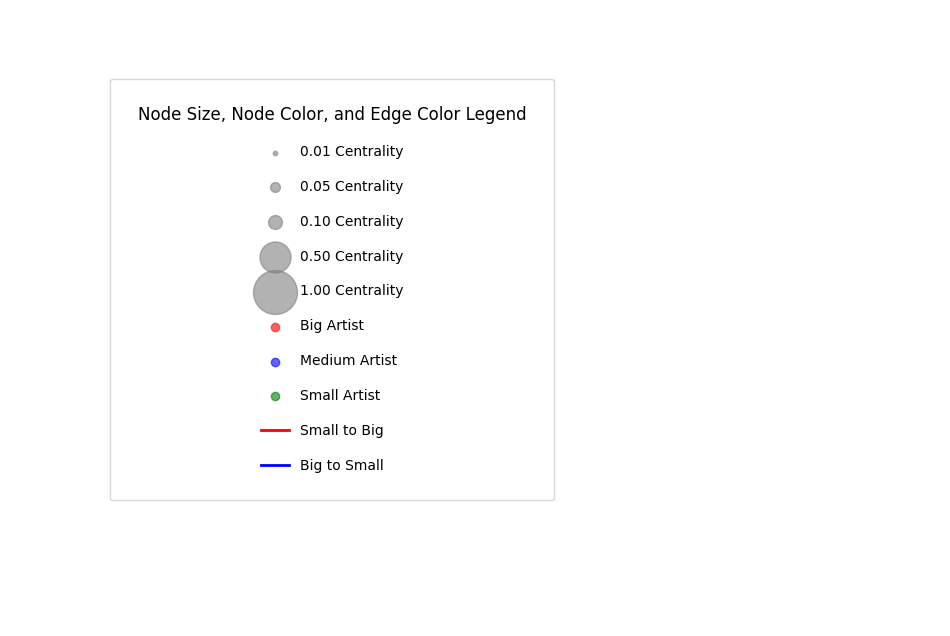

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Create a figure for the legend
plt.figure(figsize=(12, 8))  # Adjust figure size for better spacing

# Node size legend
size_values = [0.01, 0.05, 0.1, 0.5, 1]  # Example centrality values
scaled_sizes = [value * 1000 for value in size_values]  # Scale for visual clarity
size_labels = [f"{value:.2f} Centrality" for value in size_values]

# Add scatter points for the node size legend
for size, label in zip(scaled_sizes, size_labels):
    plt.scatter([], [], s=size, color='gray', alpha=0.6, label=label)

# Node color legend
color_labels = ['Big Artist', 'Medium Artist', 'Small Artist']  # Example categories
colors = ['red', 'blue', 'green']  # Corresponding colors for the categories
for color, label in zip(colors, color_labels):
    plt.scatter([], [], color=color, alpha=0.6, label=label)

# Edge color legend using lines
edge_color_labels = ['Small to Big', 'Big to Small']  # Example edge color categories
edge_colors = ['red', 'blue']  # Corresponding colors for the edge categories
edge_legend_handles = [mlines.Line2D([], [], color=color, linewidth=2, label=label)
                       for color, label in zip(edge_colors, edge_color_labels)]

# Add lines for edge color categories to the legend
for handle in edge_legend_handles:
    plt.gca().add_artist(handle)

# Combine all the legends into one
combined_handles, combined_labels = plt.gca().get_legend_handles_labels()

# Create the final legend
plt.legend(
    handles=combined_handles,
    labels=combined_labels,
    frameon=True,
    labelspacing=1.5,
    title="Node Size, Node Color, and Edge Color Legend",
    loc='upper left',
    borderpad=2,
    bbox_to_anchor=(0.1, 0.9),
    title_fontsize='large'
)

# Hide axes for a clean appearance
plt.axis('off')

# Show the plot
plt.show()